In [2287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [2288]:
data = pd.read_csv("calories-data.csv")
data.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
142,49,Male,115.3,1.91,161,125,61,1.38,854.0,HIIT,29.2,3.2,2,1,31.61
74,41,Male,94.1,1.62,172,139,50,1.13,777.0,Cardio,23.4,3.1,4,2,35.86
929,28,Female,67.3,1.67,171,157,74,0.61,479.0,Strength,29.2,2.3,3,1,24.13
750,33,Female,53.6,1.52,194,126,73,1.02,643.0,Cardio,30.9,2.3,2,1,23.20
679,54,Female,75.6,1.61,180,155,52,1.41,983.0,Yoga,34.9,2.5,4,2,29.17
384,30,Male,91.4,1.99,171,152,60,1.37,1145.0,HIIT,23.0,3.7,3,2,23.08
515,29,Female,60.0,1.62,181,161,69,0.85,684.0,Strength,28.1,1.9,2,1,22.86
436,48,Male,94.5,1.70,189,140,64,1.01,700.0,Cardio,28.2,3.5,3,2,32.70
810,45,Female,64.3,1.54,199,133,58,1.67,999.0,Yoga,15.3,2.7,4,3,27.11
452,29,Male,68.0,1.70,190,150,60,0.76,627.0,HIIT,28.9,2.9,2,1,23.53


In [2289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [2290]:
data.isnull().count()

Age                              973
Gender                           973
Weight (kg)                      973
Height (m)                       973
Max_BPM                          973
Avg_BPM                          973
Resting_BPM                      973
Session_Duration (hours)         973
Calories_Burned                  973
Workout_Type                     973
Fat_Percentage                   973
Water_Intake (liters)            973
Workout_Frequency (days/week)    973
Experience_Level                 973
BMI                              973
dtype: int64

In [2291]:
data['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

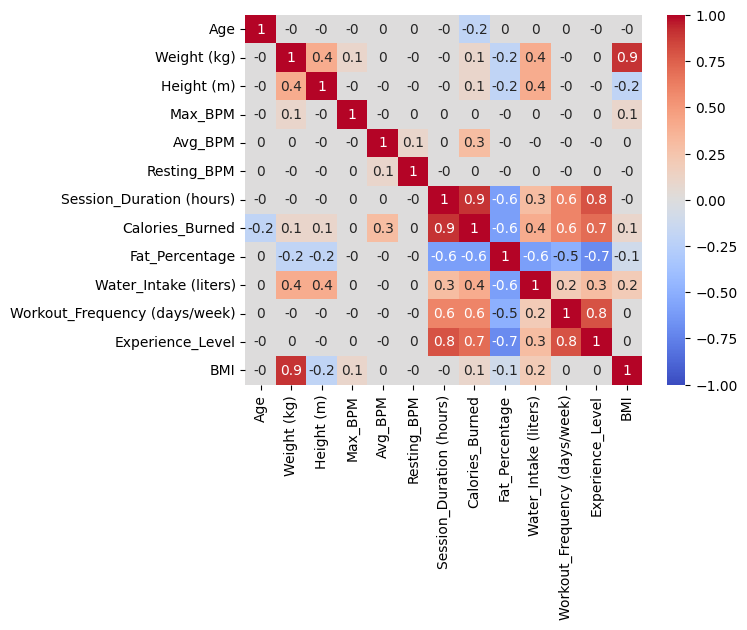

In [2292]:
import seaborn as sns
sns.heatmap(data.drop(axis=1,columns=["Gender","Workout_Type"]).corr().round(1), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

- height , weight could be used directly in BMI
- BPM shows almost no significant relation with other features
- experience level highly affects session duration to can be eliminated
- water intake doesn't have to do much with calories burnt in real world , so could be ignored
- fat percentage column seems to show wrong relation with bmi, as fat % is expected to show strong positive relation with bmi but is showing a slight negative relation. so it have to be droped

#### Eliminating less relevent Data

In [2293]:
data_new = data.drop(axis=1,columns=["Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Fat_Percentage","Water_Intake (liters)","Experience_Level"])
data_new.sample(6)

,Age,Gender,Session_Duration (hours),Calories_Burned,Workout_Type,Workout_Frequency (days/week),BMI
730,34,Female,1.02,821.0,Strength,3,18.09
877,43,Female,1.88,1117.0,Yoga,4,23.48
268,35,Female,1.03,803.0,Cardio,4,19.69
957,42,Female,1.83,1005.0,Cardio,4,23.41
179,19,Female,1.05,772.0,Yoga,3,17.16
286,29,Male,1.36,1137.0,Strength,4,31.48


#### Detecting Outliers

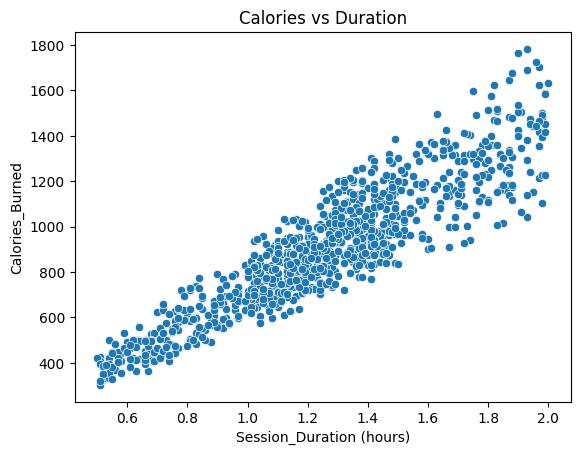

In [2294]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data_new['Session_Duration (hours)'], y=data_new['Calories_Burned'])
plt.title("Calories vs Duration")
plt.show()



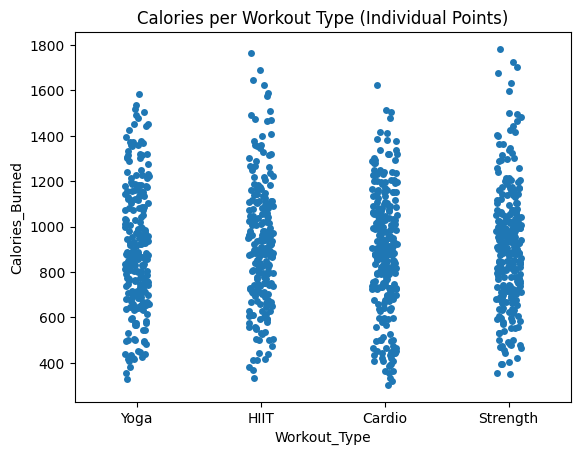

In [2295]:
#sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', style='Workout_Type', s=100)

sns.stripplot(data=data_new, x='Workout_Type', y='Calories_Burned', jitter=True)
plt.title('Calories per Workout Type (Individual Points)')
plt.show()

In [2296]:
data_new['BMI'].describe()


count    973.000000
mean      24.912127
std        6.660879
min       12.320000
25%       20.110000
50%       24.160000
75%       28.560000
max       49.840000
Name: BMI, dtype: float64

-BMI Range between 12 to 50 is usually normal for humans

In [2297]:
x = data_new.drop(axis=1,columns=["Calories_Burned"])
y = data_new["Calories_Burned"]

In [2298]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [2299]:
x_train.sample(5)

,Age,Gender,Session_Duration (hours),Workout_Type,Workout_Frequency (days/week),BMI
55,23,Male,1.47,Cardio,4,44.84
348,41,Female,1.99,Yoga,5,19.44
475,27,Male,1.82,HIIT,4,33.20
105,40,Female,1.79,Yoga,5,17.54
121,31,Male,1.29,Strength,3,27.96


### Preprocessing with Transformers

In [2300]:
trf1 = ColumnTransformer([
    ('cat_encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[1,3])
],remainder='passthrough')

In [2301]:
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(4,8))
],remainder='passthrough')

#### Creating Data preprocessing pipeline

In [2302]:
data_pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

#### Preprocessing the data

In [2303]:
x_train_final = data_pipe.fit_transform(x_train)
x_test_final = data_pipe.fit_transform(x_test)
x_train_final.shape

(778, 8)

In [2304]:
y_train.shape

(778,)

### Testing different Algorithm on the data

##### Linear Regression

In [2305]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_final,y_train)
lr.coef_

array([-38.53985286, 246.71992712,  -3.29545889,   2.41200493,
        91.01197115,  -6.70795049,  -7.42066341,  -6.74246891])

In [2306]:
y_pred = lr.predict(x_test_final)

In [2307]:
r2_score(y_test,y_pred)

0.880069793232102

#### Polynomial Regression

In [2308]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train_final)
x_test_poly = poly.fit_transform(x_test_final)

In [2309]:
polyreg = LinearRegression()
polyreg.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [2310]:
r2_score(y_test,polyreg.predict(x_test_poly))

0.8806161887500434

#### Ridge Regression

In [2311]:
from sklearn.linear_model import Ridge

In [2312]:
r = Ridge(alpha=11)
r.fit(x_train_final,y_train)
r.coef_

array([-38.20503257, 240.84858327,   0.25985841,   3.30792878,
        85.3484315 ,  -4.57962735,  -5.89787883,  -4.73070071])

In [2313]:
r2_score(y_test,r.predict(x_test_final))

0.8791625792989477

#### Lasso Regression

In [2314]:
from sklearn.linear_model import Lasso

In [2315]:
l = Lasso(alpha=5)
l.fit(x_train_final,y_train)

,alpha,5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [2316]:
r2_score(y_test,l.predict(x_test_final))

0.8774800852486674

In [2317]:
l.coef_

array([-34.04631597, 239.07251325,   0.        ,   0.82190019,
        71.32517773,  -0.        ,  -0.        ,  -0.        ])

#### Elasticnet Regression

In [2318]:
from sklearn.linear_model import ElasticNet

In [2319]:
e = ElasticNet(alpha=0.02,l1_ratio=0.3)
e.fit(x_train_final,y_train)
e.coef_

array([-3.82039452e+01,  2.40899106e+02,  2.20906275e-01,  3.29880666e+00,
        8.53741336e+01, -4.51653112e+00, -5.83278635e+00, -4.66790783e+00])

In [2320]:
r2_score(y_test,e.predict(x_test_final))

0.8791731538749874

### Decision Tree

[Text(0.5059691011235955, 0.9444444444444444, 'x[1] <= -0.046\nsquared_error = 72608.466\nsamples = 778\nvalue = 907.108'),
 Text(0.2050561797752809, 0.8333333333333334, 'x[1] <= -0.942\nsquared_error = 28498.828\nsamples = 365\nvalue = 698.715'),
 Text(0.3555126404494382, 0.8888888888888888, 'True  '),
 Text(0.0898876404494382, 0.7222222222222222, 'x[1] <= -1.515\nsquared_error = 11707.048\nsamples = 126\nvalue = 517.198'),
 Text(0.0449438202247191, 0.6111111111111112, 'x[1] <= -1.985\nsquared_error = 4380.802\nsamples = 68\nvalue = 443.691'),
 Text(0.02247191011235955, 0.5, 'x[1] <= -2.073\nsquared_error = 2460.493\nsamples = 24\nvalue = 394.583'),
 Text(0.011235955056179775, 0.3888888888888889, 'squared_error = 2353.529\nsamples = 17\nvalue = 381.0'),
 Text(0.033707865168539325, 0.3888888888888889, 'squared_error = 1183.959\nsamples = 7\nvalue = 427.571'),
 Text(0.06741573033707865, 0.5, 'x[4] <= 0.5\nsquared_error = 3395.34\nsamples = 44\nvalue = 470.477'),
 Text(0.0561797752808988

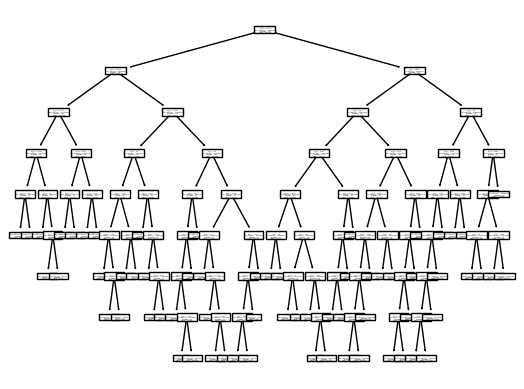

In [2321]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(min_samples_split=22,max_depth=8)
dt.fit(x_train_final,y_train)
plot_tree(dt)

In [2322]:
r2_score(y_test,dt.predict(x_test_final))

0.8543780422822465

### Random Forest

In [2323]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=180,min_samples_split=10,max_depth=7)
rfr.fit(x_train_final,y_train)

,n_estimators,180
,criterion,'squared_error'
,max_depth,7
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [2324]:
r2_score(y_test,rfr.predict(x_test_final))

0.873988683431461

In [2327]:
r2_score(y_test,pipe.predict(x_test))

0.8791706784666216

### ADABOOST

In [2328]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=90,learning_rate=0.6)
abr.fit(x_train_final,y_train)

,estimator,None
,n_estimators,90
,learning_rate,0.6
,loss,'linear'
,random_state,None


In [2329]:
r2_score(y_test,abr.predict(x_test_final))

0.8710705226767875

### Gradient Boosting

In [2335]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=80,learning_rate=0.1,max_depth=5,min_samples_split=20)
gbr.fit(x_train_final,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,80
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [2336]:
r2_score(y_test,gbr.predict(x_test_final))

0.8726076812594348

### Voting Ensemble

In [2337]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('elastic',e),('rf',rfr),('ab',abr),('gb',gbr)])
vr.fit(x_train_final,y_train)

,estimators,"[('elastic', ...), ('rf', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,alpha,0.02
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001


In [2338]:
r2_score(y_test,vr.predict(x_test_final))

0.8827960384062356

## Creating a Final PipeLine

In [2339]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('train',vr)
])

In [2340]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_encode', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [2341]:
r2_score(y_test,pipe.predict(x_test))

0.8817978712449059

In [2361]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(pipe,x_train,y_train,cv=5)

In [2362]:
print(np.mean(cv_score))

0.8673867732556099


## Exporting the Model/Pipeline

In [2363]:
import pickle as pkl
pkl.dump(pipe,open('model.pkl','wb'))